<a href="https://colab.research.google.com/github/ozlemizgi/data_e/blob/main/5_Hafta_Data_Preprocessing_Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### DEMENTIA - MENDELEY DATA

* Mendeley Data  Link: https://data.mendeley.com/datasets/tsy6rbc5d4/1
* Related Paper: https://www.sciencedirect.com/science/article/pii/S2352914819300917

#### FEATURE DESCRIPTION

* Subject ID **--> S-ID**
* MRI ID **--> MRI-ID**
* Class **--> CLASS**
* Visit **--> VISIT**
* MR delay **--> MR DELAY**
* Sex **--> SEX**
* Hand **--> HAND**
* Age **--> AGE**
* Education Level **--> EDUCATION**
* Social Economic Status **--> SES**
* The Mini Mental State Examination **--> MMSE**
* Clinical Dementia Ratio **--> CDR**
* Estimated Total Intracranial Volume **--> ETIV**
* Normalized Whole Brain Volume **--> NWBV**
* Atlas Scaling Factor **--> ASF**

In [2]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

#### Kullanacağımız Kütüphaneleri daha önce Python'a yüklemediysek önce bu paketler Komut Satırından yüklenir.

* cmd --> pip install pandas

* cmd --> pip install numpy

* cmd --> pip install matplotlib

* cmd --> pip install seaborn

* cmd --> pip install scikit-learn

In [4]:
# Veriyi okumadan önce Sütun isimlerini içerisinde barındıran bir liste oluşturduk, kendi istediğimiz gibi isimlendirdik.
features = ["S-ID", "MRI-ID", "CLASS", "VISIT", "MR DELAY", "SEX", "HAND",
            "AGE", "EDUCATION","SES","MMSE","CDR", "ETIV","NWBV","ASF"]

# Veriyi okurken names= features diyerek kendi veridiğimiz isimlere göre okuması için komut verdik.
data = pd.read_excel("Data/dementia.xlsx", names= features, header=0)
data.sample(7)

FileNotFoundError: ignored

In [ ]:
# Verisetindeki Dementia hastalığı ile ilgili olmayan ID sütunlarını veri setinden kaldıralım.
# Bunun için .drop() komutunu kullanırız.
data = data.drop(['S-ID', 'MRI-ID'], axis=1)
data.sample(7)

,CLASS,VISIT,MR DELAY,SEX,HAND,AGE,EDUCATION,SES,MMSE,CDR,ETIV,NWBV,ASF
114,Converted,1,0,F,R,85,18,1.0,29.0,0.0,1264.400000,0.700956,1.388010
233,Demented,1,0,F,R,76,12,3.0,27.0,0.5,1315.050000,0.697905,1.334550
324,Nondemented,1,0,M,R,77,16,1.0,29.0,0.0,1818.390000,0.733941,0.965141
257,Demented,2,472,M,R,71,16,3.0,27.0,0.5,1479.120383,0.749554,1.186516
344,Demented,2,700,M,R,72,16,4.0,28.0,0.5,1795.590000,0.732418,0.977396
284,Demented,2,403,F,R,68,16,1.0,29.0,0.5,1344.327970,0.733195,1.305485
347,Converted,2,774,M,R,87,16,2.0,30.0,0.0,1397.960000,0.696374,1.255400


In [ ]:
# Veri setinin boyutları
print("Satır:", data.shape[0], '\t', "Sütun:", data.shape[1])

# bir Satır boşluk bırak
print("-"*80)

# Veri setinin sütun isimleri
print(data.columns)

Satır: 373 	 Sütun: 13
--------------------------------------------------------------------------------
Index(['CLASS', 'VISIT', 'MR DELAY', 'SEX', 'HAND', 'AGE', 'EDUCATION', 'SES',
       'MMSE', 'CDR', 'ETIV', 'NWBV', 'ASF'],
      dtype='object')


In [ ]:
# Veriseti hakkında genel bilgi 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLASS      373 non-null    object 
 1   VISIT      373 non-null    int64  
 2   MR DELAY   373 non-null    int64  
 3   SEX        373 non-null    object 
 4   HAND       373 non-null    object 
 5   AGE        373 non-null    int64  
 6   EDUCATION  373 non-null    int64  
 7   SES        354 non-null    float64
 8   MMSE       371 non-null    float64
 9   CDR        373 non-null    float64
 10  ETIV       373 non-null    float64
 11  NWBV       373 non-null    float64
 12  ASF        373 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 38.0+ KB


In [ ]:
data.sample(6)

,CLASS,VISIT,MR DELAY,SEX,HAND,AGE,EDUCATION,SES,MMSE,CDR,ETIV,NWBV,ASF
107,Nondemented,1,0,F,R,92,23,1.0,29.0,0.0,1454.28,0.701155,1.206780
95,Nondemented,1,0,F,R,77,16,2.0,29.0,0.0,1432.67,0.722554,1.224980
199,Nondemented,2,673,M,R,72,18,1.0,29.0,0.0,1785.35,0.686604,0.983003
247,Nondemented,1,0,F,R,81,15,2.0,28.0,0.0,1486.07,0.753917,1.180960
349,Nondemented,1,0,M,R,68,14,3.0,26.0,0.0,1443.71,0.778042,1.215610
303,Nondemented,3,1204,F,R,80,13,2.0,28.0,0.0,1336.60,0.761973,1.313040


In [ ]:
data["CLASS"].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: CLASS, dtype: int64

##### Object değerleri numeric değerlere çevirelim:

**CLASS**

* Nondemented  --> 0
* Demented  --> 1
* Converted --> 2


**SEX**

* M  --> 0
* F  --> 1


**HAND**

* R  --> 0
* L  --> 1

In [ ]:
# replace() : verileri değiştirmek için kullanırız.
data = data.replace({'CLASS': {"Nondemented": 0, "Demented": 1, "Converted":2}})
data = data.replace({'SEX': {"M": 0, "F": 1}})
data = data.replace({'HAND': {"R": 0, "L": 1}})
data.sample(7)

,CLASS,VISIT,MR DELAY,SEX,HAND,AGE,EDUCATION,SES,MMSE,CDR,ETIV,NWBV,ASF
139,1,1,0,0,0,61,18,1.0,30.0,1.0,1956.960255,0.734008,0.896799
337,0,3,1695,0,0,81,16,3.0,30.0,0.0,1836.152429,0.743938,0.955803
136,1,1,0,1,0,78,8,5.0,23.0,1.0,1462.400000,0.690761,1.200090
160,0,5,2517,1,0,77,14,3.0,29.0,0.0,1504.392311,0.769165,1.166584
118,0,1,0,1,0,71,14,2.0,28.0,0.0,1460.660000,0.755669,1.201510
78,1,1,0,0,0,84,6,4.0,25.0,0.5,1310.330000,0.727252,1.339360
180,0,2,670,1,0,80,8,5.0,27.0,0.0,1381.420000,0.750913,1.270430


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLASS      373 non-null    int64  
 1   VISIT      373 non-null    int64  
 2   MR DELAY   373 non-null    int64  
 3   SEX        373 non-null    int64  
 4   HAND       373 non-null    int64  
 5   AGE        373 non-null    int64  
 6   EDUCATION  373 non-null    int64  
 7   SES        354 non-null    float64
 8   MMSE       371 non-null    float64
 9   CDR        373 non-null    float64
 10  ETIV       373 non-null    float64
 11  NWBV       373 non-null    float64
 12  ASF        373 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 38.0 KB


In [ ]:
# Veriyi istatistiksel açıdan inceleyelim.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLASS,373.0,0.589812,0.664461,0.000000,0.000000,0.000000,1.000000,2.000000
VISIT,373.0,1.882038,0.922843,1.000000,1.000000,2.000000,2.000000,5.000000
MR DELAY,373.0,595.104558,635.485118,0.000000,0.000000,552.000000,873.000000,2639.000000
SEX,373.0,0.571046,0.495592,0.000000,0.000000,1.000000,1.000000,1.000000
HAND,373.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AGE,373.0,77.013405,7.640957,60.000000,71.000000,77.000000,82.000000,98.000000
EDUCATION,373.0,14.597855,2.876339,6.000000,12.000000,15.000000,16.000000,23.000000
SES,354.0,2.460452,1.134005,1.000000,2.000000,2.000000,3.000000,5.000000
MMSE,371.0,27.342318,3.683244,4.000000,27.000000,29.000000,30.000000,30.000000
CDR,373.0,0.290885,0.374557,0.000000,0.000000,0.000000,0.500000,2.000000


## DATA PRE-PROCESSING

### 1) MISSIND DATA

In [ ]:
# isnull() komutu sütunlardaki eksik değer sayısını sayar. sum() komutu ise toplam ifadesidir.  
data.isnull().sum()

CLASS         0
VISIT         0
MR DELAY      0
SEX           0
HAND          0
AGE           0
EDUCATION     0
SES          19
MMSE          2
CDR           0
ETIV          0
NWBV          0
ASF           0
dtype: int64

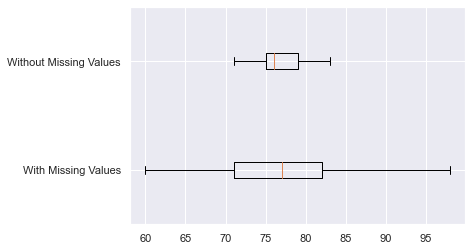

In [ ]:
SES_NAN = data.SES.isna()
SES_labels = ['With Missing Values','Without Missing Values']

box_sr = pd.Series('',index = SES_NAN.unique())

for poss in SES_NAN.unique():
    SES = SES_NAN == poss
    box_sr[poss] = data[SES].AGE
    
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],SES_labels)
plt.show()

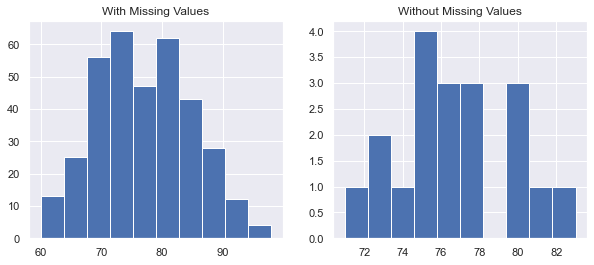

In [ ]:
SES_NAN = data.SES.isna()
SES_labels = ['With Missing Values','Without Missing Values']
AGE_range = (data.AGE.min(),data.AGE.max())

plt.figure(figsize=(10,4))

for i,poss in enumerate(SES_NAN.unique()):
    plt.subplot(1,2,i+1)
    BM = SES_NAN == poss
    data[BM].AGE.hist()
    plt.xlim = AGE_range
    plt.title(SES_labels[i])

plt.show()

#### DEAL WITH MISSING DATA

* **dropna():** eksik olan değerleri siler.
* **fillna():** eksik değerlerin yerine değer ekler

In [ ]:
# ORIJINAL VERİ
data.shape

(373, 13)

In [ ]:
# ORIJINAL VERİ
data.isnull().sum()

CLASS         0
VISIT         0
MR DELAY      0
SEX           0
HAND          0
AGE           0
EDUCATION     0
SES          19
MMSE          2
CDR           0
ETIV          0
NWBV          0
ASF           0
dtype: int64

##### DROPNA

In [ ]:
# EKSİK VERİLER KALDIRILMIŞ
data_without_NAN = data.dropna()
data_without_NAN.shape

(354, 13)

In [ ]:
data_without_NAN.isnull().sum()

CLASS        0
VISIT        0
MR DELAY     0
SEX          0
HAND         0
AGE          0
EDUCATION    0
SES          0
MMSE         0
CDR          0
ETIV         0
NWBV         0
ASF          0
dtype: int64

##### FILLNA

In [ ]:
# Eksik verileri sıfır ile doldur.
data_zero = data.fillna(0)

In [ ]:
# Eksik verileri istenilen bir değer ile doldur.
data_value = data.fillna(10)

In [ ]:
# Sütunların ortalama değerleri ile doldurma
data_mean = data.apply(lambda x: x.fillna(x.mean()),axis=0)

C:\PYTHON\Python 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\PYTHON\Python 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\PYTHON\Python 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

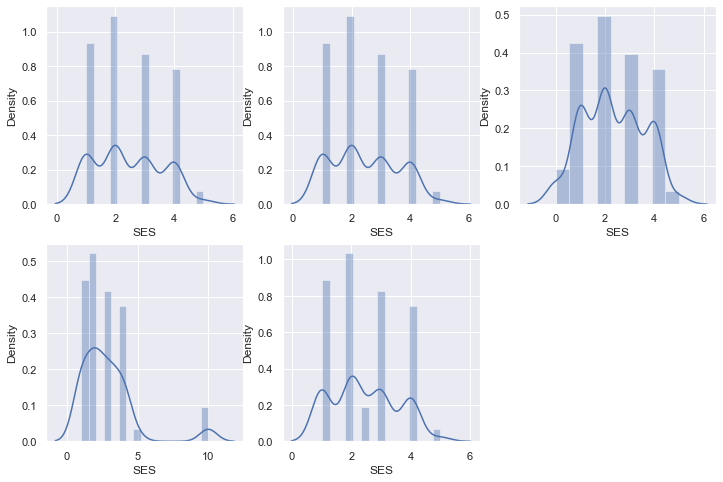

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.distplot(data_without_NAN['SES'])

plt.subplot(2,3,2)
sns.distplot(data['SES'])

plt.subplot(2,3,3)
sns.distplot(data_zero['SES'])

plt.subplot(2,3,4)
sns.distplot(data_value['SES'])

plt.subplot(2,3,5)
sns.distplot(data_mean['SES'])

plt.show()

### 2) SCALING

#### MIN-MAX SCALING

In [ ]:
X = data.drop(["CLASS"], axis=1)
y = data["CLASS"]

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X)
X_minmax = pd.DataFrame(scaled)

In [ ]:
data.sample(4)

,CLASS,VISIT,MR DELAY,SEX,HAND,AGE,EDUCATION,SES,MMSE,CDR,ETIV,NWBV,ASF
303,0,3,1204,1,0,80,13,2.0,28.0,0.0,1336.60,0.761973,1.31304
350,0,2,665,0,0,70,14,3.0,28.0,0.0,1510.36,0.770068,1.16198
248,0,2,733,1,0,83,15,2.0,29.0,0.0,1482.38,0.751045,1.18390
317,1,2,764,1,0,75,12,2.0,18.0,1.0,1478.52,0.656862,1.18700


In [ ]:
X_minmax.sample(4)

,0,1,2,3,4,5,6,7,8,9,10,11
209,0.00,0.000000,1.0,0.0,0.447368,0.294118,0.75,0.961538,0.00,0.531590,0.689820,0.327064
207,0.00,0.000000,1.0,0.0,0.526316,0.352941,NaN,0.884615,0.25,0.410888,0.613636,0.441598
46,0.25,0.255021,0.0,0.0,0.631579,0.352941,0.50,0.884615,0.25,0.377964,0.263933,0.475831
348,0.50,0.618037,0.0,0.0,0.763158,0.588235,0.25,1.000000,0.25,0.336929,0.181046,0.520503


#### STANDART SCALING

In [1]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(X)
X_standart = pd.DataFrame(scaled)

NameError: ignored

In [ ]:
X_standart.sample(4)

### 3) OUTLIERS

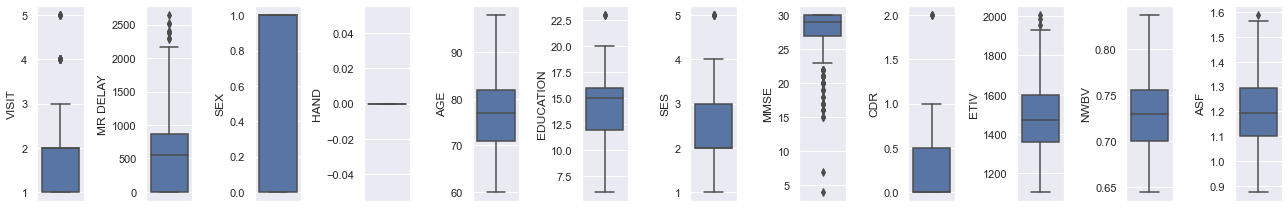

In [ ]:
plt.figure(figsize=(18,3))
for i,att in enumerate(X.columns):
    plt.subplot(1,len(X.columns),i+1)
    sns.boxplot(y=data[att])
plt.tight_layout()
plt.show()

In [ ]:
# Outlier değerlerin indeksleri
print(np.where(data['VISIT']>3.5))

(array([ 12,  31,  32,  35,  50,  65,  70,  71,  75, 100, 101, 144, 152,
       153, 159, 160, 244, 264, 265, 304, 364], dtype=int64),)


In [ ]:
# Outlier değerlerin indeksleri
print(np.where(data['EDUCATION']>22))

(array([107, 108, 109], dtype=int64),)


In [ ]:
# Outlier değerlerin indeksleri
print(np.where(data['SES']> 4.5))

(array([136, 137, 138, 161, 162, 179, 180], dtype=int64),)


In [ ]:
# Outlier değerlerin indeksleri
print(np.where(data['MMSE']< 10))

(array([100, 101], dtype=int64),)


In [ ]:
# Outlier değerlerin indeksleri
print(np.where(data['CDR']> 1.5))

(array([184, 251, 330], dtype=int64),)


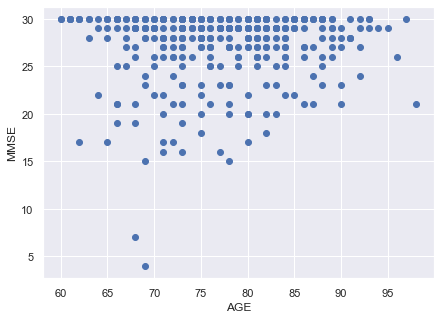

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(data['AGE'], data['MMSE'])
 
# x-axis label
ax.set_xlabel('AGE')
 
# y-axis label
ax.set_ylabel('MMSE')
plt.show()

In [ ]:
pre_process_df = data
candidate_atts = ["VISIT","MR DELAY", "EDUCATION","SES","MMSE","CDR", "ETIV", "ASF"]

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

In [ ]:
print(data.shape)
print(pre_process_df.shape)

(373, 13)
(373, 13)


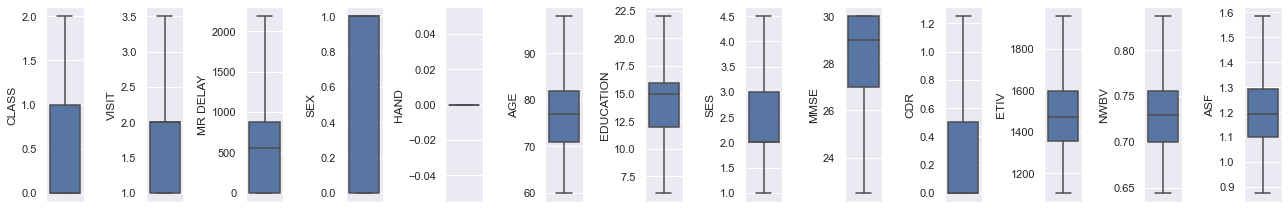

In [ ]:
plt.figure(figsize=(18,3))
for i,att in enumerate(pre_process_df.columns):
    plt.subplot(1,len(pre_process_df.columns),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()